In [28]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
import yaml

import pandas as pd
import numpy as np

from retsupp.utils.data import Subject
from retsupp.utils.utils import create_animation


subject = 14
bids_folder = Path('/data/ds-retsupp')
sub = Subject(subject)
stimulus = sub.get_stimulus(resolution=30)
onsets = sub.get_onsets()

settings = sub.get_experimental_settings()
settings

speed = settings['speed']
bar_width = settings['bar_width']
fov_size = settings['fov_size']

from braincoder.hrf import spm_hrf
import numpy as np

# Define HRF
tr = 1.7
t = np.arange(tr/2., 20 + tr/2., tr, dtype=np.float32)
hrf = spm_hrf(t, a1=4.5, d1=0.5).numpy()[:, 0]
hrf = hrf / np.sum(hrf)  # Normalize HRF to preserve amplitude

# Stimulus shape: (time, height, width)
n_time, height, width = stimulus.shape
stimulus_2d = stimulus.reshape(n_time, -1)  # (time, pixels)

# Convolve each pixel's time series with the HRF
convolved_stimulus_2d = np.zeros_like(stimulus_2d)
for i in range(stimulus_2d.shape[1]):
    convolved_stimulus_2d[:, i] = np.convolve(stimulus_2d[:, i], hrf, mode='full')[:n_time]
    # convolved_stimulus_2d[:, i] = convolved_stimulus_2d[:, i][:n_time]  # Trim to original length

# Reshape back to original spatial dimensions
convolved_stimulus = convolved_stimulus_2d.reshape(n_time, height, width)
# Reshape back to original spatial dimensions

print(convolved_stimulus.shape)  # Should match stimulus.shape

14 1 1
14 1 1
14 1 1
(258, 30, 30)


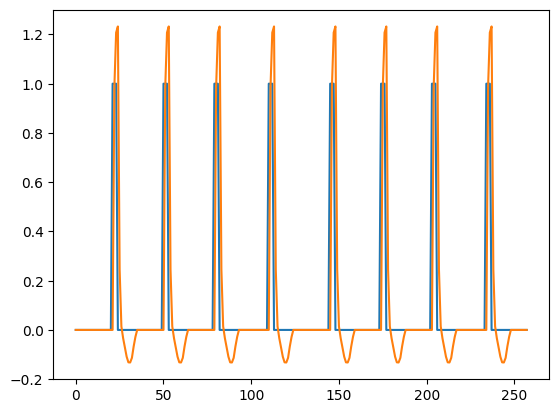

In [29]:
plt.plot(stimulus[:, 15, 15])
plt.plot(convolved_stimulus[:, 15, 15])

In [34]:
sub.get_prf_parameters_volume?

Signature: sub.get_prf_parameters_volume(model=1, type='mean', return_images=True)
Docstring:
Extract PRF parameter images for this subject.
Args:
    model (int): Model number
    runwise (bool): If True, return images for each session/run. If False, return one image per parameter.
Returns:
    If runwise is False: pd.Series with parameter labels as index and NiftiImages as values.
    If runwise is True: pd.DataFrame with columns as parameter labels, index as session/run pairs, and values as NiftiImages.
File:      ~/git/retsupp/retsupp/utils/data.py
Type:      method

In [43]:
pars = pd.read_csv("/data/ds-retsupp/derivatives/prf_summaries/model4/sub-14/sub-14_model-4_prf_voxels.tsv", sep='\t', index_col=[0,1])

# pars = pars.reset_index()
# pars['roi'] = pars['roi'].str.replace('_L', '').str.replace('_R', '')
# pars.set_index(['roi', 'voxel'], inplace=True)
pars.loc['V1_L'].sort_values('r2').iloc[-100::10]

,x,y,sd,amplitude,baseline,r2,theta,ecc,srf_size,srf_amplitude,hrf_delay,hrf_dispersion
voxel,,,,,,,,,,,,
229,1.986867,-0.630546,0.597638,77.752045,-0.197821,0.786029,-0.307304,2.084521,2.252267,0.179491,4.923689,0.344244
788,0.789185,1.171659,0.883034,70.732346,-0.570479,0.797924,0.978035,1.412656,1.819749,0.116246,6.024485,0.324432
240,1.897514,0.087881,0.552855,84.580315,-0.309710,0.809840,0.046281,1.899548,2.007579,0.149697,4.618751,0.310300
227,2.400850,-0.620071,0.566258,125.042930,-0.309768,0.816488,-0.252748,2.479631,2.547058,0.142659,4.130949,0.669047
538,0.855424,0.959345,0.747113,166.421160,-1.669044,0.826579,0.842599,1.285338,1.105770,0.000011,6.905252,0.369467
81,0.656787,-0.677094,0.523308,81.680810,-0.378770,0.833703,-0.800621,0.943306,2.618187,0.056561,5.114148,0.305370
221,2.457879,-0.774620,0.511471,166.839840,-0.324968,0.839620,-0.305305,2.577053,3.314016,0.101653,4.213590,0.696410
82,0.177286,-0.964994,0.546860,94.766884,-0.483189,0.843401,-1.389106,0.981144,2.979932,0.044306,5.559216,0.303308
83,0.834686,-0.411320,0.475566,107.782074,-0.591952,0.849311,-0.457858,0.930530,3.691433,0.013850,4.874477,0.304689


In [38]:
pars

x         y        sd  amplitude  baseline        r2  \
roi   voxel                                                                
V1_L  0      0.272727  1.909091  1.000000   4.321627 -0.049610  0.027776   
      1      0.129971 -0.016033  0.653369  34.364970 -0.043349  0.268998   
      2      0.142176 -0.044433  0.489323  51.882816 -0.176174  0.622907   
      3      0.248881 -0.196380  0.409314  69.178604 -0.312540  0.743389   
      4      0.064030  0.100980  0.407132  34.776253 -0.099004  0.282724   
...               ...       ...       ...        ...       ...       ...   
V3B_R 521    3.000000  3.000000  1.000000   7.437283 -0.011272  0.015439   
      522    3.000000 -2.454546  1.000000   9.343951 -0.024686  0.038602   
      523   -3.000000 -0.272727  1.000000   0.872669 -0.005784  0.001836   
      524    0.023055 -0.240511  0.250308  22.545088 -0.022876  0.106342   
      525    0.272727  3.000000  1.000000   1.964820 -0.012951  0.011178   

                theta       ecc  srf_size  srf_amplitude  hrf_delay  \
roi   voxel                                                           
V1_L  0      1.428899  1.928473  2.000000       0.001000   0.000000   
      1     -0.122738  0.130956  1.541170       0.363572   4.113155   
      2     -0.302903  0.148957  1.864112       0.141044   4.619894   
      3     -0.668029  0.317028  2.680217       0.026069   5.368376   
      4      1.005688  0.119569  1.630137       0.182593   5.847849   
...               ...       ...       ...            ...        ...   
V3B_R 521    0.785398  4.242641  2.000000       0.001000   0.000000   
      522   -0.685729  3.876183  2.000000       0.001000   0.000000   
      523   -3.050933  3.012371  2.000000       0.001000   0.000000   
      524   -1.475232  0.241614  1.457003       0.331250   4.723467   
      525    1.480136  3.012371  2.000000       0.001000   0.000000   

             hrf_dispersion  
roi   voxel                  
V1_L  0            0.000000  
      1            0.521968  
      2            0.333007  
      3            0.306358  
      4            0.341915  
...                     ...  
V3B_R 521          0.000000  
      522          0.000000  
      523          0.000000  
      524          0.304193  
      525          0.000000  

[9849 rows x 12 columns]

In [47]:
from nilearn import image
sub.get_bold_mask().get_fdata().sum()

293846.0

In [23]:
from nilearn import plotting, image, input_data
mask = sub.get_retinotopic_atlas(True)

v1_mask = image.math_img('mask == 1', mask=mask)
v1_mask.to_filename('/data/ds-retsupp/derivatives/volume_masks/sub-14/v1_mask.nii.gz')

/Users/gdehol/git/retsupp/retsupp/utils/data.py:452: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  varea_img = image.resample_to_img(varea_img, target_img=func_mask, interpolation='nearest', force_resample=True)


In [24]:
mean_ts = bids_folder / 'derivatives' / 'mean_signal' / f'sub-{subject:02d}'/ f'sub-{subject:02d}_desc-mean_bold.nii.gz'

In [30]:
masker = input_data.NiftiMasker(mask_img=v1_mask)

v1_ts = masker.fit_transform(mean_ts)

In [ ]:
x, y = sub.get_grid_coordinates(resolution=30)

14 1 1


In [31]:
np.savez_compressed(Path('~/git/computation-in-neuroeconomics-workshop2025/notebooks/resources/assignment3.npz').expanduser(), stimulus=stimulus.astype(bool), convolved_stimulus=convolved_stimulus.astype(np.float32), v1_ts=v1_ts.astype(np.float32),
                    x_coordinates=x, y_coordinates=y)


In [52]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

def create_animation(stimulus, frametimes=None, interval=250, display=True):
    """
    Create an animation from a 3D stimulus array.
    Parameters:
    - stimulus: 3D numpy array where the first dimension is time (frames).
    - frametimes: Optional array of frame times.
    - interval: Delay between frames in milliseconds.
    Returns:
    - HTML object to display the animation in a Jupyter notebook.
    """
    if frametimes is None:
        frametimes = range(stimulus.shape[0])

    fig, ax = plt.subplots(figsize=(8, 8))
    fig.patch.set_facecolor('none')  # Transparent figure background
    ax.axis('off')  # Remove axes and ticks

    def update(frame):
        ax.clear()
        ax.imshow(stimulus[frame, :, :], cmap='gray', vmin=0, vmax=1, origin='lower')
        ax.set_title(f"Frame: {frame}, Time: {frametimes[frame]}")
        ax.axis('off')  # Ensure axes are off for every frame
        return ax

    ani = FuncAnimation(fig, update, frames=len(frametimes), interval=interval)
    plt.close(fig)  # Prevents static display of the last frame

    if display:
        return HTML(ani.to_jshtml())
    else:
        return ani

In [ ]:
# Fix: Remove bbox_inches and pad_inches from Animation.save()
# Use tight_layout and subplots_adjust for whitespace control
import matplotlib.animation as animation
import matplotlib.pyplot as plt
from pathlib import Path

def save_side_by_side_movie_tight_v2(stimulus, convolved_stimulus, filename, interval=100):
    n_frames = min(stimulus.shape[0], convolved_stimulus.shape[0])
    fig, axes = plt.subplots(1, 2, figsize=(12, 6), gridspec_kw={'wspace': 0, 'hspace': 0})
    for ax in axes:
        ax.axis('off')
    im1 = axes[0].imshow(stimulus[0], cmap='gray', vmin=0, vmax=1, origin='lower')
    im2 = axes[1].imshow(convolved_stimulus[0], cmap='gray', vmin=0, vmax=1, origin='lower')
    axes[0].set_title('Stimulus', fontsize=16)
    axes[1].set_title('Convolved Stimulus', fontsize=16)
    plt.tight_layout()
    plt.subplots_adjust(left=0, right=1, top=0.92, bottom=0, wspace=0, hspace=0)

    def update(frame):
        im1.set_data(stimulus[frame])
        im2.set_data(convolved_stimulus[frame])
        return [im1, im2]

    ani = animation.FuncAnimation(fig, update, frames=n_frames, interval=interval, blit=True)
    ani.save(filename, writer='ffmpeg', dpi=100)
    plt.close(fig)

# Save the improved side-by-side movie (no bbox_inches)
save_side_by_side_movie_tight_v2(
    stimulus,
    convolved_stimulus,
    Path('~/git/computation-in-neuroeconomics-workshop2025/slides/resources/stimuli_side_by_side_tight.mp4').expanduser(),
    interval=100
)
